### Projeto de Escalonamento parte 2 ###

Neste projeto, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)

stride do  A : 100.0
A  rodou por  100  timeslice, faltam  0
stride do  B : 100.0
B  rodou por  100  timeslice, faltam  0
Unfairness: 0.5


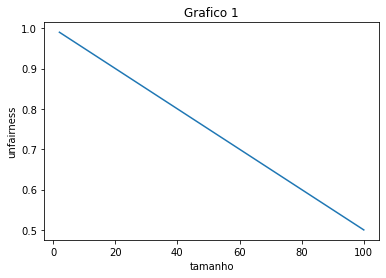

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from operator import attrgetter
#Esse é o Stride com o simulador simples não mexi com os bloqueados pq nenhum processo nunca ficou bloqueado devido a não fazer E/S
#Autor: Kennedy Coelho Nolasco
class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    

class Stride(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        self.passos = []
        for x in self.prontos:
            a = (0,x.nome,x.prio)
            self.passos.append(a)
    def remove(self):
        for x in self.prontos:
            if x.tam==0:
                self.prontos.remove(x)
                for y in self.passos:
                    if y[1] == x.nome:
                        self.passos.remove(y)
    def pronto(self,Processo):
        
        a=3
    def proximo(self,N):
        
        menorPasso = 100000
        for x in self.passos:
            if x[0]<menorPasso and any(y.nome == x[1] for y in self.prontos):
                menorPasso = x[0]
        maiorStride = 0
        p = self.prontos[0]
        for x in self.passos:
            if x[0] == menorPasso and N/x[2] > maiorStride and any(y.nome == x[1] for y in self.prontos) :
                maiorStride = N/x[2]
                nomeMaior = x[1]
        for x in self.prontos:
            if x.nome == nomeMaior:
                p = x
                
        for x in self.passos:

            if x[1] == p.nome:
                a = (x[0]+(N/p.prio),x[1],x[2])
                self.passos.remove(x)
                self.passos.append(a)
                break
        print('stride do ',p.nome,':',maiorStride)
        return p #processo p eh escolhido


nprocs = 2
nomes = ['A','B']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([100,100])
prio = [100,100]

total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],prio[i],0)) #cria uma lista procs de Processos
    
quantum = 100
tempoBloq = 1

escalonador = Stride(procs) #troque escalonador pelo seu escalonador
bloqueados = []
N = 10000
tempo = 0
random.seed(0)
unfair=0
x = np.linspace(0,0,0)
plt.xlabel('tamanho')
plt.ylabel('unfairness')
i=[2,10,20,50,100]
y=[0.99,0.95,0.9,0.75,0.5]
plt.plot(i,y)
while total>0:
    p = escalonador.proximo(N)
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        escalonador.remove()
        total-=rodou
        tempo+=rodou
        if(p.tam==0):
            if len(escalonador.prontos)>0:
                unfair+=tempo
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
print('Unfairness:',unfair/tempo)
plt.title('Grafico 1')
plt.show()

    

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
from operator import attrgetter
#Esse é o Stride com o simulador mais avançado
#Autor: Kennedy Coelho Nolasco
class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    

class Stride(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        self.passos = [] # aqui eu guardo os passos que os programas andaram
        for x in self.prontos:
            a = (0,x.nome,x.prio)
            self.passos.append(a)
    def remove(self): #removo o programa caso ele chegue em tempo 0 e removo os passos dele tambem
        for x in self.prontos:
            if x.tam==0:
                self.prontos.remove(x)
                for y in self.passos:
                    if y[1] == x.nome:
                        self.passos.remove(y)
    def NovaTupla(self,p): #adiciono uma nova tupla que indica os passos do programa que chegou
        a = (0,p.nome,p.prio)
        self.passos.append(a)
    def pronto(self,Processo):# se o programa ta pronto entao adiciono na lista de prontos
        
        self.prontos.append(Processo)
    def bloqueou(self,Processo): #removo um processo dos prontos indicando que ele foi bloqueado
        for x in self.prontos: #caso seja bloqueado o programa sai da lista de prontos 
            if x.nome == Processo.nome:
                self.prontos.remove(x)
    def proximo(self,N):
        
        menorPasso = 100000 #eu procuro o cara que andou menos e que esteja ainda na lista de prontos
        for x in self.passos:
            if x[0]<menorPasso and any(y.nome == x[1] for y in self.prontos):
                menorPasso = x[0]
        maiorStride = 0 #agora pego o cara que andou menos e procuro o cara que tem maior passada ou stride
        p = self.prontos[0]
        nomeMaior = ''
        for x in self.passos:  
            if x[0] == menorPasso and N/x[2] > maiorStride and any(y.nome == x[1] for y in self.prontos):
                maiorStride = N/x[2]
                nomeMaior = x[1]
        for x in self.prontos: #aqui eu pego ele na lista de prontos
            if x.nome == nomeMaior:
                p = x
                
        for x in self.passos: # aqui eu atualizo os passos dele 
            if x[1] == p.nome:
                a = (x[0]+(N/p.prio),x[1],x[2])
                self.passos.remove(x)
                self.passos.append(a)
                break
        print('stride do',p.nome,':',maiorStride)
        return p #processo p eh escolhido

nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([5,5,5,5])
prio = [40,80,160,320]

total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],prio[i],0)) #cria uma lista procs de Processos

quantum = 2
tempoBloq = 2

escalonador = Stride(procs)
bloqueados = []


maximo = 10
chanceNovoProcesso = 60
chanceIo = 30
minTime = 4
maxTime = 10
conj = [40,80,160,320]
tempoR=0 #tempo de resposta
tempoRT=0 #tempo de resposta total
contaProc = 1 
tempo = 0
N = 10000 # esse é a constante do stride
#descomente essa linha caso queira que os random sempre dêem o mesmo resultado
random.seed(0)
tempoM = 0
copia = []
tempoE = 0
for x in escalonador.prontos:
    a = copy.deepcopy(x) # aqui é pra ter o tempo original dos processos, que uso na metrica de espera
    copia.append(a)
while tempo<maximo or len(escalonador.prontos)>0:
    
    #Novo processo tem chanceProcesso% de chance surgir enquanto o tempo não chegar no máximo
    if(tempo<maximo and random.randint(1,100)<chanceNovoProcesso):
        p = Processo('P'+str(contaProc),random.randint(1,chanceIo),random.randint(minTime,maxTime),random.choice(conj),tempo)
        print("Processo",p.nome," chegou no tempo",tempo)
        a = copy.deepcopy(p)
        copia.append(a)
        escalonador.NovaTupla(p) #adiciono a tupla do cara nos passos
        escalonador.pronto(p) # e adiciono ele nos prontos
        contaProc+=1
        

    p = escalonador.proximo(N)
    
    if(p is not None):
        for x in copia:
            if x.nome == p.nome:
                proximo = x
        if(p.tam == proximo.tam): # verifico o tempo original dele pra ver se foi executado antes
                tempoR = abs(tempo-p.chegada)# tempo de resposta é o tempo antes de ser executado
                tempoRT+= tempoR
        rodou, fezio = p.roda(quantum)
        escalonador.remove()
        if(fezio and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
            escalonador.bloqueou(p) #bloqueio ele dos prontos
            tempoE-=tempoBloq
        total-=rodou
        tempo+=rodou
        if(p.tam==0): #aqui é pra metrica dos tempos
            for x in copia:
                if x.nome == p.nome:
                    proximo = x
            tempoE += abs(tempo - p.chegada - proximo.tam)
            tempoM += abs(tempo - p.chegada) #tempo de execução é  o tempo depois de ser executado
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade
        tempo+=1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                print(i[0].nome, 'voltou dos bloqueados')
                escalonador.pronto(i[0])
                del i
x = contaProc-1 +4
print('tempo de execucao:',tempoM/x)
print('tempo de resposta:',tempoRT/x)
print('tempo de espera:',tempoE/x)

Processo P1  chegou no tempo 0
stride do A : 250.0
A  rodou por  2  timeslice, faltam  3
stride do P1 : 250.0
P1  rodou por  2  timeslice, faltam  5
Processo P2  chegou no tempo 4
stride do B : 125.0
B  rodou por  2  timeslice, faltam  3
Processo P3  chegou no tempo 6
stride do P3 : 125.0
P3  rodou por  2  timeslice, faltam  3
Processo P4  chegou no tempo 8
stride do C : 62.5
C  rodou por  2  timeslice, faltam  3
stride do P2 : 62.5
P2  rodou por  2  timeslice, faltam  8
stride do P4 : 62.5
P4  rodou por  2  timeslice, faltam  2
stride do D : 31.25
D  rodou por  2  timeslice, faltam  3
stride do D : 31.25
D  rodou por  2  timeslice, faltam  1
stride do C : 62.5
C  rodou por  2  timeslice, faltam  1
stride do P2 : 62.5
P2  rodou por  2  timeslice, faltam  6
stride do P4 : 62.5
P4  fez e/s, falta  1
stride do D : 31.25
D  rodou por  1  timeslice, faltam  0
stride do B : 125.0
B  rodou por  2  timeslice, faltam  1
P4 voltou dos bloqueados
stride do P3 : 125.0
P3  rodou por  2  timeslice, 

numero sorteado foi: 34
A  rodou por  2  timeslice, faltam  8
numero sorteado foi: 195
B  rodou por  2  timeslice, faltam  8
numero sorteado foi: 65
A  rodou por  2  timeslice, faltam  6
numero sorteado foi: 126
B  rodou por  2  timeslice, faltam  6
numero sorteado foi: 115
B  rodou por  2  timeslice, faltam  4
numero sorteado foi: 166
B  rodou por  2  timeslice, faltam  2
numero sorteado foi: 53
A  rodou por  2  timeslice, faltam  4
numero sorteado foi: 124
B  rodou por  2  timeslice, faltam  0
numero sorteado foi: 49
A  rodou por  2  timeslice, faltam  2
numero sorteado foi: 77
A  rodou por  2  timeslice, faltam  0
Unfairness: 0.8


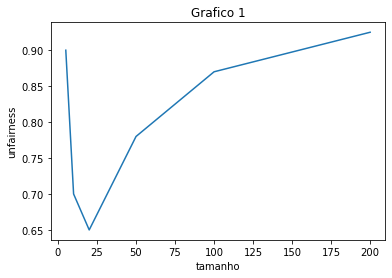

In [58]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from operator import attrgetter
#Esse é o Lottery com o simulador simples não mexi com os bloqueados pq nenhum processo nunca ficou bloqueado devido a não fazer E/S
#Autor: Kennedy Coelho Nolasco
class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    

class Lottery(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        self.TotalTickets = 0
        for x in self.prontos:
            self.TotalTickets+=x.prio
        
    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        a =1
    def remove(self):
        for x in self.prontos:
            if(x.tam ==0):
                self.TotalTickets-=x.prio
        self.prontos = [i for i in self.prontos if i.tam>0]     
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        escolhido = random.randint(0,self.TotalTickets-1)
        print('numero sorteado foi:', escolhido)
        ticketAtual = 0
        p = self.prontos[0]
        for x in self.prontos:
            if(escolhido>=ticketAtual and escolhido<x.prio+ticketAtual):
                p = x 
            ticketAtual+=x.prio
        return p #processo p eh escolhido
    
nprocs = 2
nomes = ['A','B']
chanceio = [0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([10,10])
prio = [100,100]
total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],prio[i],0)) #cria uma lista procs de Processos

quantum = 2
tempoBloq = 1
soma = 0
escalonador = Lottery(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0
unfair=0
random.seed(1)
x = np.linspace(0,0,0)
plt.xlabel('tamanho')
plt.ylabel('unfairness')
i=[5,10,20,50,100,200]
y=[0.9,0.7,0.65,0.78,0.87,0.925]
plt.plot(i,y)
while total>0:
    p = escalonador.proximo()
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        escalonador.remove()
        
        total-=rodou
        tempo+=rodou
        if(p.tam==0):
            if len(escalonador.prontos)>0:
                unfair+=tempo
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
print('Unfairness:',unfair/tempo)
plt.title('Grafico 1')
plt.show()

Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
from operator import attrgetter
#Esse é o Lottery com o simulador avançado 
#Aluno: Kennedy Coelho Nolasco
class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    

class Lottery(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        self.TotalTickets = 0
        for x in self.prontos:
            self.TotalTickets+=x.prio
        
    def pronto(self,Processo):  #boto ele na lista de prontos e adiciono os tickets dele nos tickets totais
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.TotalTickets+=Processo.prio
        self.prontos.append(Processo)
    def bloqueou(self,Processo): #removo um processo dos prontos indicando que ele foi bloqueado
        for x in self.prontos: #removo os tickets do processo dos tickets totais
            if x.nome == Processo.nome:
                self.TotalTickets-=Processo.prio
                self.prontos.remove(x)
    def remove(self): #quando ele sai tiro ele da lista e tiro os tickets dele dos totais
        for x in self.prontos:
            if(x.tam ==0):
                self.TotalTickets-=x.prio
        self.prontos = [i for i in self.prontos if i.tam>0]     
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        escolhido = random.randint(0,self.TotalTickets-1) #sorteio um numero entre 0 e tickets totais -1
        print('sorteou o numero:',escolhido)
        ticketAtual = 0 
        p = self.prontos[0]
        for x in self.prontos: # vou caminhando na lista ate encontrar o cara a quem esse ticket pertence e retorno ele
            if(escolhido>=ticketAtual and escolhido<x.prio+ticketAtual):
                p = x 
            ticketAtual+=x.prio
        return p #processo p eh escolhido
    
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([5,5,5,5])
prio = [40,80,160,320]
total = tamanho.sum()
conj = [40,80,160,320]
procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],prio[i],0)) #cria uma lista procs de Processos

quantum = 2
tempoBloq = 2

escalonador = Lottery(procs)
bloqueados = []


maximo = 10
chanceNovoProcesso = 60
chanceIo = 30
minTime = 4
maxTime = 10

tempoM = 0
copia = []
tempoE = 0
for x in escalonador.prontos:
    a = copy.deepcopy(x)
    copia.append(a)
contaProc = 1
tempo = 0
tempoR=0
tempoRT =0
#descomente essa linha caso queira que os random sempre dêem o mesmo resultado
random.seed(3)
while tempo<maximo or len(escalonador.prontos)>0 :
    
    #Novo processo tem chanceProcesso% de chance surgir enquanto o tempo não chegar no máximo
    if(tempo<maximo and random.randint(1,100)<chanceNovoProcesso):
        p = Processo('P'+str(contaProc),random.randint(1,chanceIo),random.randint(minTime,maxTime),random.choice(conj),tempo)
        print("Processo",p.nome," chegou no tempo",tempo)
        a = copy.deepcopy(p)
        copia.append(a)
        escalonador.pronto(p)
        contaProc+=1
        

    p = escalonador.proximo()
    
    if(p is not None):
        for x in copia:
            if x.nome == p.nome:
                proximo = x
        if(p.tam == proximo.tam): # verifico o tempo original dele pra ver se foi executado antes
                tempoR = abs(tempo-p.chegada)# tempo de resposta é o tempo antes de ser executado
                tempoRT+= tempoR
        rodou, fezio = p.roda(quantum)
        print('tickets do processo:',p.prio)
        escalonador.remove()
        if(fezio and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
            escalonador.bloqueou(p)
            tempoE-=tempoBloq #reduzo tempo de espera pelo tempobloq
        total-=rodou
        tempo+=rodou
        if(p.tam==0):
            for x in copia:
                if x.nome == p.nome:
                    proximo = x
            tempoE += abs(tempo - p.chegada - proximo.tam)
            tempoM += abs(tempo - p.chegada) #tempo de execução é  o tempo depois de ser executado
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade
        tempo+=1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                print(i[0].nome, 'voltou dos bloqueados')
                escalonador.pronto(i[0])
                del i  
x = contaProc-1 +4
print('tempo de execucao:',tempoM/x)
print('tempo de resposta:',tempoRT/x)
print('tempo de espera:',tempoE/x)


Processo P1  chegou no tempo 0
sorteou o numero: 378
D  rodou por  2  timeslice, faltam  3
tickets do processo: 320
sorteou o numero: 640
P1  rodou por  2  timeslice, faltam  6
tickets do processo: 80
Processo P2  chegou no tempo 4
sorteou o numero: 265
C  rodou por  2  timeslice, faltam  3
tickets do processo: 160
Processo P3  chegou no tempo 6
sorteou o numero: 1107
P3  rodou por  2  timeslice, faltam  7
tickets do processo: 320
sorteou o numero: 813
P2  rodou por  2  timeslice, faltam  2
tickets do processo: 320
sorteou o numero: 308
D  rodou por  2  timeslice, faltam  1
tickets do processo: 320
sorteou o numero: 1300
P3  rodou por  2  timeslice, faltam  5
tickets do processo: 320
sorteou o numero: 1071
P3  rodou por  2  timeslice, faltam  3
tickets do processo: 320
sorteou o numero: 31
A  rodou por  2  timeslice, faltam  3
tickets do processo: 40
sorteou o numero: 131
C  rodou por  2  timeslice, faltam  1
tickets do processo: 160
sorteou o numero: 1210
P3  fez e/s, falta  2
tickets

Na célula abaixo, temos o mesmo simulador da parte 1 do projeto:

In [72]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from operator import attrgetter
#Esse é o MLFQ com o simulador simples não mexi com os bloqueados pq nenhum processo nunca ficou bloqueado devido a não fazer E/S
#Autor: Kennedy Coelho Nolasco
class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    

class MLFQ(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        self.fila = 2 # numero de filas
        self.tamfilas = [3,1] # quantum de cada fila
        self.temboost = 10 # numero do boost

    def pronto(self,Processo):
        
        a=1 #os processos chegam no mesmo momento e não fazem IO, não usarei isso agora
    def remove(self):
        self.prontos = [i for i in self.prontos if i.tam>0] #eu removo todos os processos que tem timeslice igual ou menor que 0
    def boost(self):
        for x in self.prontos: # caso esse método seja chamado eu reseto a prioridade de todos os elemento
            x.prio = self.fila-1
    def robin(self,p): # esse é o método que faz o round robin
        for x in self.prontos: #aqui é a parte do round robin, eu so faço round robin com os programas de prioridade igual 
            if x.prio == p.prio and x.nome!=p.nome: #eu nao sei se era pra fazer round robin antes ou depois do programa executar entao optei por fazer depois
                a = self.prontos.index(p)
                b = self.prontos.index(x)
                if(a<b): #so troco se o elemento estiver na frente do atual
                    self.prontos[a] = x
                    self.prontos[b] = p
    def proximo(self):
        
        p = max(self.prontos,key=attrgetter('prio')) #chamo o processo que tem maior prioridade
        while(p.prio>self.fila-1): #caso essa prioridade seja maior que o numero de filas eu removo esse elemento e chamo outro
            self.prontos = [i for i in self.prontos if i.prio==p.prio]
            p = max(self.prontos,key=attrgetter('prio'))
        return p #processo p eh escolhido



nprocs = 4
nomes = ['A','B','C','D']
chanceio = [60,60,60,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([5,5,5,5])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos
quantum = 2
tempoBloq = 1

escalonador = MLFQ(procs) #troque escalonador pelo seu escalonador
bloqueados = []
escalonador.boost()
tempo = 0
random.seed(0)
boostbase = escalonador.temboost #comparador do tempo de boost
while total>0:
    p = escalonador.proximo()
    if(p is not None):
        rodou, fezio = p.roda(escalonador.tamfilas[p.prio]) #adicione quantum como parâmetro, por enquanto nao temos E/S
        if(fezio==0 and p.prio>0):
            p.prio-=1
        for x in escalonador.prontos: 
            if x == p: # verifico se o cara ainda existe na lista de processos
                escalonador.robin(p)
        escalonador.remove() # removo todos os elementos que tem tempo = 0
        if(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        tempo+=rodou
        if(tempo>=boostbase): # se o tempo for igual ao tempo do comparador eu reseto a prioridade de todo mundo
            escalonador.boost()
            boostbase+=escalonador.temboost # e somo o tempo pro proximo boost
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1


    

A  fez e/s, falta  4
B  rodou por  1  timeslice, faltam  4
C  fez e/s, falta  4
D  rodou por  1  timeslice, faltam  4
A  fez e/s, falta  3
C  rodou por  1  timeslice, faltam  3
A  rodou por  1  timeslice, faltam  2
B  fez e/s, falta  3
D  rodou por  3  timeslice, faltam  1
C  rodou por  1  timeslice, faltam  2
A  fez e/s, falta  1
B  rodou por  1  timeslice, faltam  2
D  rodou por  1  timeslice, faltam  0
A  rodou por  1  timeslice, faltam  0
C  fez e/s, falta  1
B  fez e/s, falta  1
C  fez e/s, falta  0
B  rodou por  1  timeslice, faltam  0


Nesta, temos um simulador avançado, com E/S e novos processos chegando em momentos diferentes:

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from operator import attrgetter
#Esse é o MLFQ com o simulador avançado
class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    

class MLFQ(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        self.fila = 1 # numero de filas
        self.tamfilas = [4] # quantum de cada fila
        self.temboost = 10 # numero do boost

    def pronto(self,Processo):
        
        self.prontos.append(Processo)
    def bloqueou(self,Processo): #removo um processo dos prontos indicando que ele foi bloqueado
        for x in self.prontos:
            if x.nome == Processo.nome:
                self.prontos.remove(x)
    def robin(self,p): # esse é o método que faz o round robin
        for x in self.prontos: #aqui é a parte do round robin, eu so faço round robin com os programas de prioridade igual 
            if x.prio == p.prio and x.nome!=p.nome: #eu nao sei se era pra fazer round robin antes ou depois do programa executar entao optei por fazer depois
                a = self.prontos.index(p)
                b = self.prontos.index(x)
                if(a<b): #so troco se o elemento estiver na frente do atual
                    self.prontos[a] = x
                    self.prontos[b] = p
    def remove(self):
        self.prontos = [i for i in self.prontos if i.tam>0] #eu removo todos os processos que tem timeslice igual ou menor que 0
    def boost(self):
        for x in self.prontos:
            x.prio = self.fila-1
    def proximo(self):
        
        p = max(self.prontos,key=attrgetter('prio')) #chamo o processo que tem menor tempo para terminar
        while(p.prio>self.fila-1):
            self.prontos = [i for i in self.prontos if i.prio==p.prio]
            p = max(self.prontos,key=attrgetter('prio'))
        return p #processo p eh escolhido



nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([3,3,3,3])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos
quantum = 2
tempoBloq = 2

escalonador = MLFQ(procs)
bloqueados = []


maximo = 10
chanceNovoProcesso = 60
chanceIo = 30
minTime = 4
maxTime = 10

tempoM = 0
contaProc = 1
tempo = 0
escalonador.boost()
baseboost = escalonador.temboost
#descomente essa linha caso queira que os random sempre dêem o mesmo resultado
random.seed(0)

while tempo<maximo or len(escalonador.prontos)>0:
    
    #Novo processo tem chanceProcesso% de chance surgir enquanto o tempo não chegar no máximo
    if(tempo<maximo and random.randint(1,100)<chanceNovoProcesso):
        p = Processo('P'+str(contaProc),random.randint(1,chanceIo),random.randint(minTime,maxTime),(escalonador.fila)-1,tempo)
        print("Processo",p.nome," chegou no tempo",tempo)
        escalonador.pronto(p)
        contaProc+=1
        

    p = escalonador.proximo()
    
    if(p is not None):
        rodou, fezio = p.roda(escalonador.tamfilas[p.prio])
        if(fezio and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
            escalonador.bloqueou(p)
        if(fezio==0 and p.prio>0):
            p.prio-=1;
        for x in escalonador.prontos:
            if x == p:  # verifico se o cara ainda existe na lista de processos ou não foi bloqueado
                escalonador.robin(p)
        
        total-=rodou
        escalonador.remove()
        tempo+=rodou
        if(tempo>=baseboost):
            escalonador.boost()
            baseboost+=escalonador.temboost
        if(p.tam==0):
            tempoM += abs(tempo - p.chegada) #tempo de execução é  o tempo depois de ser executado
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade
        tempo+=1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                print(i[0].nome, 'voltou dos bloqueados')
                escalonador.pronto(i[0])
                del i  
x = contaProc-1 + 4
print('tempo de execucao medio:',tempoM/x)

Processo P1  chegou no tempo 0
A  rodou por  3  timeslice, faltam  0
Processo P2  chegou no tempo 3
B  rodou por  3  timeslice, faltam  0
Processo P3  chegou no tempo 6
C  rodou por  3  timeslice, faltam  0
Processo P4  chegou no tempo 9
D  rodou por  3  timeslice, faltam  0
P1  fez e/s, falta  6
P2  rodou por  4  timeslice, faltam  3
P3  fez e/s, falta  5
P1 voltou dos bloqueados
P4  rodou por  4  timeslice, faltam  1
P2  rodou por  3  timeslice, faltam  0
P3 voltou dos bloqueados
P1  rodou por  4  timeslice, faltam  2
P4  rodou por  1  timeslice, faltam  0
P3  rodou por  4  timeslice, faltam  1
P1  fez e/s, falta  1
P3  rodou por  1  timeslice, faltam  0
tempo de execucao medio: 15.125
